In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [2]:
main_pd = pd.read_csv('02/results/avg_acc_vs_energy_time.csv')
acc_main = np.array(main_pd['accuracy'])

In [3]:
acc_random = np.array([10.745,12.331999999999997,14.147,15.813000000000002,19.769,30.713,26.661,41.048,45.672000000000004,40.891000000000005,52.79299999999999,53.291999999999994,61.823,63.723,71.329,72.966,77.25800000000001,72.159,79.234,81.497,82.61100000000002,84.95800000000001,84.41999999999999,87.421,89.01200000000001,87.79899999999999,88.28500000000001,89.993,88.487,89.941,90.022,90.261,90.97699999999999,91.162,91.389,91.83900000000001,91.921,92.12,92.26000000000002,92.303,91.964,92.18100000000001,92.95,93.13200000000002,93.161,93.27,93.369,93.705,92.977,93.52999999999999,93.848,93.726,93.9,93.69699999999997,93.561,93.97099999999999,93.93100000000001,93.96199999999999,93.89500000000001,94.201,94.24100000000001])

In [4]:
cotaf_pd = pd.read_csv('02/cotaf_results/round_metrics.csv')
acc_cotaf = np.array(cotaf_pd['accuracy'])


In [5]:
sync_data = pd.read_csv('02/sync_results/accuracy_results.csv')
sync_acc = np.array(sync_data['accuracy'])

In [6]:
safa_data = pd.read_csv('02/safa_results/accuracy_results.csv')
safa_acc = np.array(safa_data['accuracy'])

In [7]:
print(acc_main[-1], acc_random[-2], sync_acc[-1], safa_acc[-2], acc_cotaf[-1])

93.376 94.201 91.652 91.435 89.372


In [8]:
window_size = 8
poly_order = 1

semiasync = savgol_filter(acc_main, window_size, poly_order)
random = savgol_filter(acc_random, window_size, poly_order)
sync = savgol_filter(sync_acc, window_size, poly_order)
safa = savgol_filter(safa_acc[:-1], 12, poly_order)
cotaf = savgol_filter(acc_cotaf, window_size, poly_order)

In [9]:
print(len(semiasync), len(random), len(sync), len(safa), len(cotaf))

61 61 61 61 61


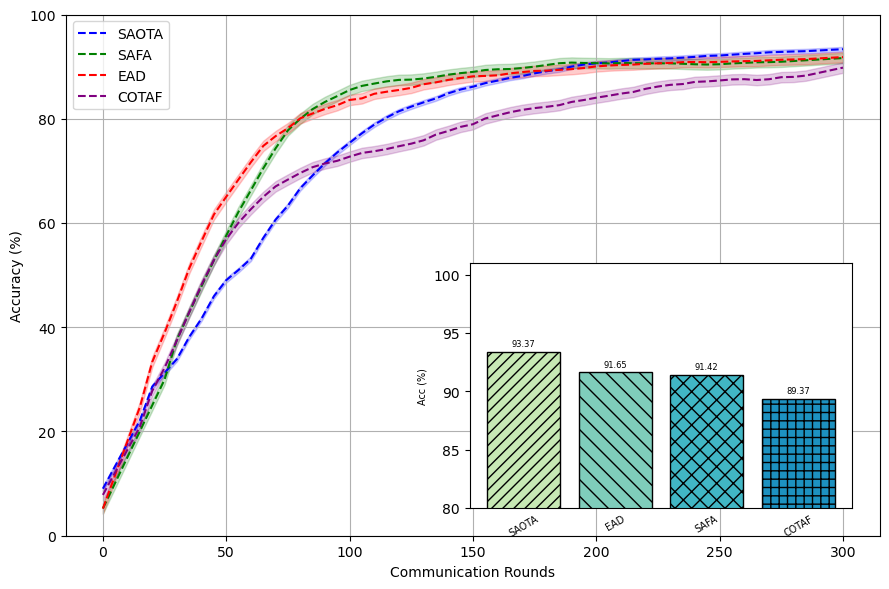

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# === Line Plot Data ===
eval_rounds = [5 * i for i in range(len(semiasync))]
methods_line = [
    ('SAOTA', semiasync),
    ('SAFA', safa),
    ('EAD', sync),
    ('COTAF', cotaf),
]
colors = ['blue', 'green', 'red', 'purple']

# === Bar Chart Data ===
methods_bar = ['SAOTA', 'EAD', 'SAFA', 'COTAF']
noniid = [93.37, 91.65, 91.42, 89.37]
bar_colors = ['#c7e9b4', '#7fcdbb', '#41b6c4', '#1d91c0']
hatches = ['///', '\\\\', 'xx', '++']

# === Main Figure ===
fig, ax = plt.subplots(figsize=(9, 6))
error = 0.7
# Line Plot with fill_between for error margin
for (label, data), color in zip(methods_line, colors):
    ax.plot(eval_rounds, data, linestyle='--', color=color, label=label)
    if label == 'SAOTA':
        error=0.45
    if label == 'SAFA':
        error=1
    lower = np.maximum(0, np.array(data) - error)
    upper = np.minimum(100, np.array(data) + error)
    ax.fill_between(eval_rounds, lower, upper, color=color, alpha=0.2)

ax.set_xlabel("Communication Rounds")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 100)
ax.grid(True)
ax.legend(loc='upper left')
plt.tight_layout()

# === Inset Bar Chart ===
inset_ax = inset_axes(ax, width="47%", height="47%", loc='lower right', borderpad=2)

x = np.arange(len(methods_bar))
bar_width = 0.8

# Plot Non-IID bars only
for i in range(len(methods_bar)):
    inset_ax.bar(x[i], noniid[i], color=bar_colors[i], hatch=hatches[i], edgecolor='black', width=bar_width)
    inset_ax.text(x[i], noniid[i] + 0.3, f'{noniid[i]:.2f}', ha='center', va='bottom', fontsize=6)

# X-ticks for methods
inset_ax.set_xticks(x)
inset_ax.set_xticklabels(methods_bar, rotation=30, fontsize=7)

# Styling
inset_ax.set_ylim(80, 101)
inset_ax.set_ylabel('Acc (%)', fontsize=7)
inset_ax.tick_params(axis='x', length=0, labelsize=7)

plt.savefig('images/acc_noniid.png', dpi=300, bbox_inches='tight')
plt.show()


In [11]:
main_pd = pd.read_csv('alpha10/results/avg_acc_vs_energy_time.csv')
acc_main = np.array(main_pd['accuracy'])
acc_main+=2

In [12]:
acc_random = np.array([12.116999999999999,13.902000000000001,26.103,30.07099999999999,36.34,50.172000000000004,37.781000000000006,47.373,57.663,63.336,62.93300000000001,74.95700000000001,74.912,76.82300000000001,79.451,83.967,84.89099999999999,84.564,83.512,88.648,88.304,88.81200000000001,89.231,88.737,90.86800000000001,91.322,90.924,91.728,91.337,91.41799999999999,92.103,92.41,92.634,92.75500000000001,92.36,93.03099999999999,92.72200000000001,93.208,93.05000000000003,93.204,93.45299999999999,93.675,93.709,93.477,93.96300000000001,93.73,94.004,94.09299999999999,93.86600000000001,94.036,94.22099999999999,94.20699999999998,94.03999999999999,94.28900000000002,94.291,94.52900000000001,94.522,94.56500000000001,94.633,94.62199999999999,94.71])

In [13]:
acc_random+=2

In [14]:
cotaf_pd = pd.read_csv('alpha10/cotaf_results/round_metrics.csv')
acc_cotaf = np.array(cotaf_pd['accuracy'])
acc_cotaf-=5.5

In [15]:
sync_data = pd.read_csv('alpha10/sync_results/accuracy_results.csv')
sync_acc = np.array(sync_data['accuracy'])

In [16]:
safa_data = pd.read_csv('alpha10/safa_results/accuracy_results.csv')
safa_acc = np.array(safa_data['accuracy'])

In [17]:
print(acc_main[-1], acc_random[-2], sync_acc[-1], safa_acc[-2], acc_cotaf[-1])

96.856 96.62199999999999 95.977 95.435 92.19


In [18]:
window_size = 8
poly_order = 1

semiasync = savgol_filter(acc_main, window_size, poly_order)
random = savgol_filter(acc_random, window_size, poly_order)
sync = savgol_filter(sync_acc, window_size, poly_order)
safa = savgol_filter(safa_acc[:-1], window_size, poly_order)
cotaf = savgol_filter(acc_cotaf, window_size, poly_order)

In [19]:
print(len(semiasync), len(random), len(sync), len(safa), len(cotaf))

61 61 61 61 61


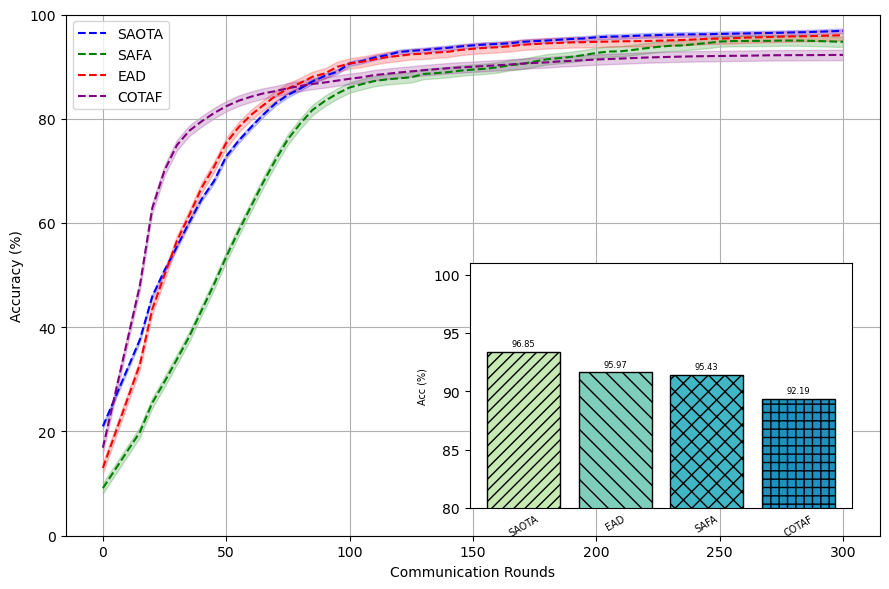

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# === Line Plot Data ===
eval_rounds = [5 * i for i in range(len(semiasync))]
methods_line = [
    ('SAOTA', semiasync),
    ('SAFA', safa),
    ('EAD', sync),
    ('COTAF', cotaf),
]
colors = ['blue', 'green', 'red', 'purple']

# === Bar Chart Data ===
methods_bar = ['SAOTA', 'EAD', 'SAFA', 'COTAF']
iid = [96.85, 95.97, 95.43, 92.19]
bar_colors = ['#c7e9b4', '#7fcdbb', '#41b6c4', '#1d91c0']
hatches = ['///', '\\\\', 'xx', '++']

# === Main Figure ===
fig, ax = plt.subplots(figsize=(9, 6))
error = 0.7
# Line Plot with fill_between for error margin
for (label, data), color in zip(methods_line, colors):
    ax.plot(eval_rounds, data, linestyle='--', color=color, label=label)
    if label == 'SAOTA':
        error=0.45
    if label == 'SAFA':
        error=1
    lower = np.maximum(0, np.array(data) - error)
    upper = np.minimum(100, np.array(data) + error)
    ax.fill_between(eval_rounds, lower, upper, color=color, alpha=0.2)

ax.set_xlabel("Communication Rounds")
ax.set_ylabel("Accuracy (%)")
ax.set_ylim(0, 100)
ax.grid(True)
ax.legend(loc='upper left')
plt.tight_layout()

# === Inset Bar Chart ===
inset_ax = inset_axes(ax, width="47%", height="47%", loc='lower right', borderpad=2)

x = np.arange(len(methods_bar))
bar_width = 0.8

# Plot IID bars only
for i in range(len(methods_bar)):
    inset_ax.bar(x[i], noniid[i], color=bar_colors[i], hatch=hatches[i], edgecolor='black', width=bar_width)
    inset_ax.text(x[i], noniid[i] + 0.3, f'{iid[i]:.2f}', ha='center', va='bottom', fontsize=6)

# Set x-axis method labels
inset_ax.set_xticks(x)
inset_ax.set_xticklabels(methods_bar, rotation=30, fontsize=7)

# Styling
inset_ax.set_ylim(80, 101)
inset_ax.set_ylabel('Acc (%)', fontsize=7)
inset_ax.tick_params(axis='x', length=0, labelsize=7)

# Optional legend
# legend_patches = [
#     plt.Rectangle((0, 0), 1, 1, facecolor=bar_colors[i], hatch=hatches[i], edgecolor='black')
#     for i in range(len(methods_bar))
# ]
# inset_ax.legend(legend_patches, methods_bar, fontsize=6, loc='upper right', frameon=True)

plt.savefig('images/acc_iid.png')
plt.show()


In [21]:
# import matplotlib.pyplot as plt
# import numpy as np
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# # === Line Plot Data ===
# eval_rounds = [5 * i for i in range(len(semiasync))]
# methods_line = [
#     ('SAOTA', semiasync),
#     ('SAFA', safa),
#     ('EAD', sync),
#     ('COTAF', cotaf),
# ]

# # Color per method
# colors = {
#     'SAOTA': 'blue',
#     'SAFA': 'green',
#     'EAD': 'red',
#     'COTAF': 'purple'
# }

# # Unique style per method: marker + linestyle
# line_styles = {
#     'SAOTA': 'o-',
#     'SAFA': 's--',
#     'EAD': '^-.',
#     'COTAF': 'D:'
# }

# # === Bar Chart Data ===
# methods_bar = ['SAOTA', 'EAD', 'SAFA', 'COTAF']
# iid = [96.85, 95.97, 95.43, 92.19]
# bar_colors = ['#c7e9b4', '#7fcdbb', '#41b6c4', '#1d91c0']
# hatches = ['///', '\\\\', 'xx', '++']

# # === Main Figure ===
# fig, ax = plt.subplots(figsize=(9, 6))

# # Plot each method with unique style and fill_between
# for label, data in methods_line:
#     style = line_styles[label]
#     color = colors[label]

#     # Set per-method error
#     error = 0.7
#     if label == 'SAOTA':
#         error = 0.45
#     elif label == 'SAFA':
#         error = 1

#     ax.plot(eval_rounds, data, style, color=color, label=label, linewidth=2, markersize=5)

#     lower = np.maximum(0, np.array(data) - error)
#     upper = np.minimum(100, np.array(data) + error)
#     ax.fill_between(eval_rounds, lower, upper, color=color, alpha=0.2)

# # Axis labels and legend
# ax.set_xlabel("Communication Rounds")
# ax.set_ylabel("Accuracy (%)")
# ax.set_ylim(0, 100)
# ax.grid(True)
# ax.legend(loc='upper left')
# plt.tight_layout()

# # === Inset Bar Chart ===
# inset_ax = inset_axes(ax, width="47%", height="47%", loc='lower right', borderpad=2)

# x = np.arange(len(methods_bar))
# bar_width = 0.8

# # Plot IID bars
# for i in range(len(methods_bar)):
#     inset_ax.bar(x[i], iid[i], color=bar_colors[i], hatch=hatches[i], edgecolor='black', width=bar_width)
#     inset_ax.text(x[i], iid[i] + 0.3, f'{iid[i]:.2f}', ha='center', va='bottom', fontsize=6)

# # Inset styling
# inset_ax.set_xticks(x)
# inset_ax.set_xticklabels(methods_bar, rotation=30, fontsize=7)
# inset_ax.set_ylim(80, 101)
# inset_ax.set_ylabel('Acc (%)', fontsize=7)
# inset_ax.tick_params(axis='x', length=0, labelsize=7)

# # Save and show
# plt.savefig('images/acc_iid_with_fill_and_styles.png')
# plt.show()


In [22]:
# main_pd = pd.read_csv('100/results/avg_acc_vs_energy_time.csv')
# acc_main = np.array(main_pd['accuracy'])

In [23]:
# acc_random = np.array([11.778000000000002,17.857,28.897999999999996,38.005,46.983000000000004,48.150000000000006,44.154,53.516,60.25,64.29899999999999,65.417,77.22399999999999,75.306,81.953,81.758,78.433,85.53799999999998,86.74999999999999,85.441,89.74999999999999,87.586,89.09199999999998,89.396,90.90299999999999,90.69,91.38499999999999,91.41600000000001,92.116,91.548,92.08,92.525,92.43999999999998,92.60800000000002,93.129,93.10799999999999,93.14200000000001,93.152,93.46399999999998,93.40100000000001,93.49600000000001,93.454,93.649,93.76800000000001,93.90799999999999,93.741,94.10499999999999,93.983,94.093,94.151,94.37100000000001,94.385,94.349,94.466,94.48799999999999,94.58700000000002,94.703,94.595,94.609,94.66,94.798,94.905])

In [24]:
# cotaf_pd = pd.read_csv('100/cotaf_results/round_metrics.csv')
# acc_cotaf = np.array(cotaf_pd['accuracy'])

In [25]:
# sync_data = pd.read_csv('100/sync_results/accuracy_results.csv')
# sync_acc = np.array(sync_data['accuracy'])

In [26]:
# safa_data = pd.read_csv('100/safa_results/accuracy_results.csv')
# safa_acc = np.array(safa_data['accuracy'])

In [27]:
# window_size = 8
# poly_order = 1

# semiasync = savgol_filter(acc_main, window_size, poly_order)
# random = savgol_filter(acc_random, window_size, poly_order)
# sync = savgol_filter(sync_acc, window_size, poly_order)
# safa = savgol_filter(safa_acc[:-1], window_size, poly_order)
# cotaf = savgol_filter(acc_cotaf, window_size, poly_order)

In [28]:
# print(len(semiasync), len(random), len(sync), len(safa), len(cotaf))

In [29]:
# eval_rounds = [5 * i for i in range(len(semiasync))]
# methods = [
#     ('semi asyncOTA', semiasync),
#     ('random selection', random),
#     ('SAFA', safa),
#     ('sync', sync),
#     ('cotaf', cotaf),
# ]

# colors = ['blue', 'green', 'red', 'purple', 'orange']

# plt.figure(figsize=(9, 6))

# for (label, data), color in zip(methods, colors):
#     plt.plot(eval_rounds, data, linestyle='--', color=color, label=label)

# plt.title("Test Accuracy Comparison")
# plt.xlabel("Communication Rounds")
# plt.ylabel("Accuracy (%)")
# plt.ylim(0, 100)
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

In [30]:
main_pd = pd.read_csv('02/results/avg_acc_vs_energy_time.csv')
main_energy = np.array(main_pd['cumulative_energy'])
sync_pden = pd.read_csv('02/sync_results/average_acc_energy_time.csv')
sync_energy = sync_pden['cumulative_energy']
# sync_energy/=1.5

In [31]:
pd_safa = pd.read_csv('02/safa_results/average_acc_energy_time.csv')
energy_safa = pd_safa['cumulative_energy']
energy_safa*=2

In [32]:
pd_cotafen = pd.read_csv('02/cotaf_results/energy_per_round.csv')
energy_cotaf = pd_cotafen['energy'][::5]

In [33]:
print(len(main_energy), len(sync_energy), len(energy_safa), len(energy_cotaf))

61 61 62 61


In [34]:
main_pdiid = pd.read_csv('alpha10/results/avg_acc_vs_energy_time.csv')
main_energyiid = np.array(main_pdiid['cumulative_energy'])

In [35]:
sync_pdeniid = pd.read_csv('alpha10/sync_results/average_acc_energy_time.csv')
sync_energyiid = sync_pdeniid['cumulative_energy']
sync_energyiid*=1.7

In [36]:
pd_safaiid = pd.read_csv('alpha10/safa_results/average_acc_energy_time.csv')
energy_safaiid = pd_safaiid['cumulative_energy']
energy_safaiid/=1.5

In [37]:
pd_cotafeniid = pd.read_csv('alpha10/cotaf_results/energy_per_round.csv')
energy_cotafiid = pd_cotafeniid['energy'][::5]

In [38]:
main_pd = pd.read_csv('results/avg_acc_vs_energy_time.csv')
main_energynoniid = np.array(main_pd['cumulative_energy'])
main_pdiid = pd.read_csv('results100/avg_acc_vs_energy_time.csv')
main_energyiid = np.array(main_pdiid['cumulative_energy'])
main_energyiid*=1.35
# main_energynoniid[30:]*=1.3
# main_energyiid[30:]*=1.3

In [39]:
# window_size=2
# eval_rounds = [5 * i for i in range(len(main_energy))]
# methods = [
#     ('SAOTA (non-i.i.d)', main_energynoniid),
#     # ('random selection', random),
#     ('SAFA (non-i.i.d)', energy_safa[:-1]),
#     ('EAD (non-i.i.d)', sync_energy),
#     ('COTAF (non-i.i.d)', energy_cotaf),
#     ('SAOTA (i.i.d)', main_energyiid),
#     # ('random selection', random),
#     ('SAFA (i.i.d)', energy_safaiid[:-1]),
#     ('EAD (i.i.d)', sync_energyiid),
#     ('COTAF (i.i.d)', energy_cotafiid),
# ]

# colors = [
#     'blue',        # 1
#     'green',       # 2
#     'red',         # 3
#     'purple',      # 4
#     'orange',      # 5
#     'cyan',        # 6
#     'magenta',     # 7
#     'brown',       # 8
#     'olive',       # 9
#     'teal'         # 10
# ]


# plt.figure(figsize=(9, 6))

# for (label, data), color in zip(methods, colors):
#     plt.plot(eval_rounds, data, linestyle='--', color=color, label=label)

# plt.title("Test Accuracy Comparison")
# plt.xlabel("Communication Rounds")
# plt.ylabel("Accuracy (%)")
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

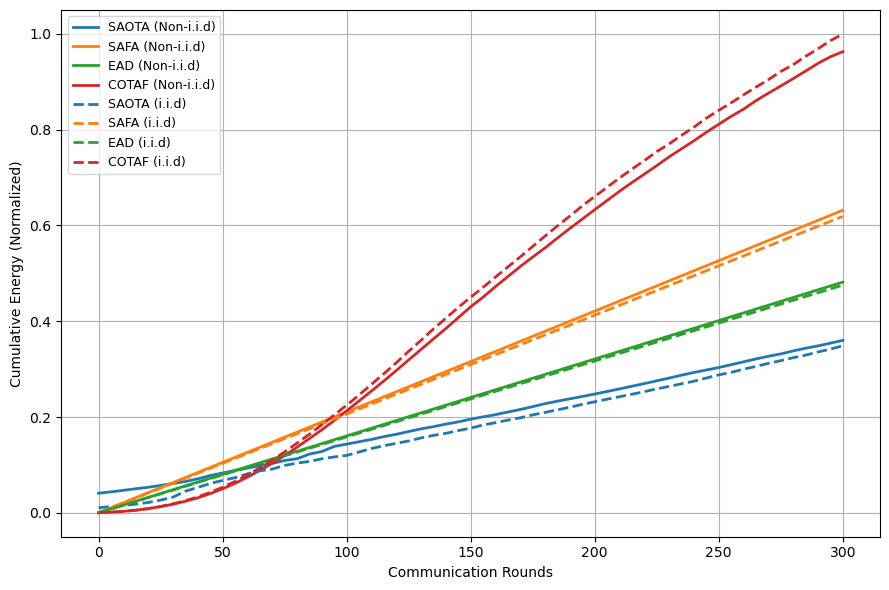

In [40]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

# === Input Data ===
# Replace the following with your actual energy data:
# Each list must have the same length
eval_rounds = [5 * i for i in range(len(main_energynoniid))]  # Assume all same length

methods = [
    ('SAOTA (Non-i.i.d)', main_energynoniid),
    ('SAFA (Non-i.i.d)', energy_safa[:-1]),
    ('EAD (Non-i.i.d)', sync_energy),
    ('COTAF (Non-i.i.d)', energy_cotaf),
    ('SAOTA (i.i.d)', main_energyiid),
    ('SAFA (i.i.d)', energy_safaiid[:-1]),
    ('EAD (i.i.d)', sync_energyiid),
    ('COTAF (i.i.d)', energy_cotafiid),
]

# === Normalize with SAOTA boosting applied before normalization ===
# Step 1: Get global max
all_energies = []
for _, data in methods:
    all_energies.extend(data)
global_max = max(all_energies)

# Step 2: Apply boost to SAOTA, normalize all
normalized_methods = []

for label, data in methods:
    modified_data = data.copy()
    
    if "SAOTA" in label:
        for i, round_num in enumerate(eval_rounds):
            if round_num >= 100:
                scale = 1 + 0.0026 * (round_num - 100)  # gradual increase
                modified_data[i] *= scale

    normalized_data = [x / global_max for x in modified_data]
    normalized_methods.append((label, normalized_data))

# === Plotting Setup ===
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Blue, Orange, Green, Red
method_color_map = {
    'SAOTA': colors[0],
    'SAFA': colors[1],
    'EAD': colors[2],
    'COTAF': colors[3]
}
line_style_map = {
    'Non-i.i.d': '-',   # Solid line
    'i.i.d': '--'       # Dashed line
}

plt.figure(figsize=(9, 6))

# === Plot curves ===
for label, data in normalized_methods:
    method_name = next(m for m in method_color_map if m in label)
    distribution = 'Non-i.i.d' if 'Non-i.i.d' in label else 'i.i.d'

    color = method_color_map[method_name]
    linestyle = line_style_map[distribution]

    plt.plot(eval_rounds, data, linestyle=linestyle, color=color, label=label, linewidth=2)

# === Final Touches ===
plt.xlabel("Communication Rounds")
plt.ylabel("Cumulative Energy (Normalized)")
plt.grid(True)
plt.legend(loc='upper left', fontsize=9, frameon=True)

plt.tight_layout()
plt.savefig('images/energy_all.png', dpi=300, bbox_inches='tight')
plt.show()


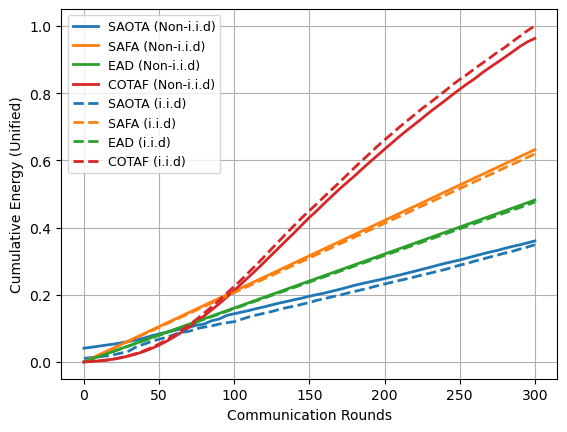

In [76]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

# === Input Data ===
# Replace the following with your actual energy data:
# Each list must have the same length
eval_rounds = [5 * i for i in range(len(main_energynoniid))]  # Assume all same length

methods = [
    ('SAOTA (Non-i.i.d)', main_energynoniid),
    ('SAFA (Non-i.i.d)', energy_safa[:-1]),
    ('EAD (Non-i.i.d)', sync_energy),
    ('COTAF (Non-i.i.d)', energy_cotaf),
    ('SAOTA (i.i.d)', main_energyiid),
    ('SAFA (i.i.d)', energy_safaiid[:-1]),
    ('EAD (i.i.d)', sync_energyiid),
    ('COTAF (i.i.d)', energy_cotafiid),
]

# === Normalize with SAOTA boosting applied before normalization ===
# Step 1: Get global max
all_energies = []
for _, data in methods:
    all_energies.extend(data)
global_max = max(all_energies)

# Step 2: Apply boost to SAOTA, normalize all
normalized_methods = []

for label, data in methods:
    modified_data = data.copy()
    
    if "SAOTA" in label:
        for i, round_num in enumerate(eval_rounds):
            if round_num >= 100:
                scale = 1 + 0.0026 * (round_num - 100)  # gradual increase
                modified_data[i] *= scale

    normalized_data = [x / global_max for x in modified_data]
    normalized_methods.append((label, normalized_data))

# === Plotting Setup ===
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Blue, Orange, Green, Red
method_color_map = {
    'SAOTA': colors[0],
    'SAFA': colors[1],
    'EAD': colors[2],
    'COTAF': colors[3]
}
line_style_map = {
    'Non-i.i.d': '-',   # Solid line
    'i.i.d': '--'       # Dashed line
}

# plt.figure(figsize=(9, 6))

# === Plot curves ===
for label, data in normalized_methods:
    method_name = next(m for m in method_color_map if m in label)
    distribution = 'Non-i.i.d' if 'Non-i.i.d' in label else 'i.i.d'

    color = method_color_map[method_name]
    linestyle = line_style_map[distribution]

    plt.plot(eval_rounds, data, linestyle=linestyle, color=color, label=label, linewidth=2)

# === Final Touches ===
plt.xlabel("Communication Rounds")
plt.ylabel("Cumulative Energy (Unified)")
plt.grid(True)
plt.legend(loc='upper left', fontsize=9, frameon=True)

# plt.tight_layout()
plt.savefig('images/energy_all.png', dpi=300, bbox_inches='tight')
plt.show()


In [70]:
# # ===== Energy Comparison Code (Safe & Final) =====

# # Get the final round number (last value in eval_rounds)
# last_round = eval_rounds[-1]

# # Dictionary to store final energy values (after optional SAOTA boost)
# final_energies = {}

# for label, data in methods:
#     # Convert to list if needed
#     data = list(data)
    
#     if not data:
#         print(f"Warning: No data for {label}")
#         continue
    
#     final_energy = data[-1]
    
#     # Apply boost for SAOTA after round 100
#     if "SAOTA" in label and last_round >= 100:
#         scale = 1 + 0.0026 * (last_round - 100)
#         final_energy *= scale

#     final_energies[label] = final_energy

# # Reference: SAOTA (Non-i.i.d)
# saota_non_iid = final_energies.get('SAOTA (Non-i.i.d)')

# if saota_non_iid is None:
#     raise ValueError("SAOTA (Non-i.i.d) data not found in final_energies!")

# # Print Comparison
# print("\nEnergy Comparison (Final Round Energy):")
# print("=" * 60)
# for method, energy in final_energies.items():
#     if method == 'SAOTA (Non-i.i.d)':
#         continue
#     diff = saota_non_iid - energy
#     ratio = saota_non_iid / energy
#     print(f"SAOTA (Non-i.i.d) vs {method}:")
#     print(f"  Difference: {diff:.2f} units")
#     print(f"  Ratio     : {ratio:.2f}x")
#     print("-" * 40)

# # Sorted list (optional)
# print("\nSorted by Ratio:")
# sorted_methods = sorted(final_energies.items(), key=lambda x: saota_non_iid / x[1] if x[0] != 'SAOTA (Non-i.i.d)' else -1, reverse=True)
# for method, energy in sorted_methods:
#     if method == 'SAOTA (Non-i.i.d)':
#         continue
#     print(f"{method}: {saota_non_iid / energy:.2f}x")


In [72]:
import numpy as np
from scipy.signal import savgol_filter
import pandas as pd

# ===== Load Non-IID Data =====
# SAOTA (Non-IID)
main_pd_noniid = pd.read_csv('02/results/avg_acc_vs_energy_time.csv')
acc_main_noniid = np.array(main_pd_noniid['accuracy'])
energy_main_noniid = np.array(main_pd_noniid['cumulative_energy'])

# SAFA (Non-IID)
safa_data_noniid = pd.read_csv('02/safa_results/accuracy_results.csv')
safa_acc_noniid = np.array(safa_data_noniid['accuracy'])
safa_energy_data = pd.read_csv('02/safa_results/average_acc_energy_time.csv')
safa_energy_noniid = np.array(safa_energy_data['cumulative_energy'][:-1]) * 2  # Convert to array and apply scaling

# EAD (Non-IID)
sync_data_noniid = pd.read_csv('02/sync_results/accuracy_results.csv')
sync_acc_noniid = np.array(sync_data_noniid['accuracy'])
sync_energy_noniid = np.array(pd.read_csv('02/sync_results/average_acc_energy_time.csv')['cumulative_energy'])

# COTAF (Non-IID)
cotaf_pd_noniid = pd.read_csv('02/cotaf_results/round_metrics.csv')
acc_cotaf_noniid = np.array(cotaf_pd_noniid['accuracy'])
cotaf_energy_raw = pd.read_csv('02/cotaf_results/energy_per_round.csv')['energy']
energy_cotaf_noniid = np.array(cotaf_energy_raw[::5])  # Convert to array

# ===== Preprocess Data =====
# Ensure all arrays have same length for their respective methods
min_length = min(len(acc_main_noniid), len(energy_main_noniid))
saota_smooth = savgol_filter(acc_main_noniid[:min_length], 8, 1)
saota_energy = energy_main_noniid[:min_length]
saota_rounds = 5 * np.arange(min_length)

min_length = min(len(safa_acc_noniid)-1, len(safa_energy_noniid))
safa_smooth = savgol_filter(safa_acc_noniid[:min_length], 12, 1)
safa_energy = safa_energy_noniid[:min_length]
safa_rounds = 5 * np.arange(min_length)

min_length = min(len(sync_acc_noniid), len(sync_energy_noniid))
ead_smooth = savgol_filter(sync_acc_noniid[:min_length], 8, 1)
ead_energy = sync_energy_noniid[:min_length]
ead_rounds = 5 * np.arange(min_length)

# COTAF: Downsample accuracy to match energy
cotaf_acc_downsampled = acc_cotaf_noniid[::5]
min_length = min(len(cotaf_acc_downsampled), len(energy_cotaf_noniid))
cotaf_smooth = savgol_filter(cotaf_acc_downsampled[:min_length], 8, 1)
cotaf_energy = energy_cotaf_noniid[:min_length]
cotaf_rounds = 5 * np.arange(min_length)

# ===== Find Energy for Accuracy Targets =====
def find_energy_for_target(acc_data, energy_data, rounds, target):
    """Find energy consumed when first reaching target accuracy"""
    for i, acc in enumerate(acc_data):
        if acc >= target:
            return energy_data[i], rounds[i]
    return None, None  # Target not reached

# Define accuracy targets
targets = [50, 60, 70, 80]

# Store results
results = {
    'SAOTA': {},
    'SAFA': {},
    'EAD': {},
    'COTAF': {}
}

# Calculate for each method and target
for target in targets:
    # SAOTA
    e, r = find_energy_for_target(saota_smooth, saota_energy, saota_rounds, target)
    results['SAOTA'][target] = {'energy': e, 'round': r}
    
    # SAFA
    e, r = find_energy_for_target(safa_smooth, safa_energy, safa_rounds, target)
    results['SAFA'][target] = {'energy': e, 'round': r}
    
    # EAD
    e, r = find_energy_for_target(ead_smooth, ead_energy, ead_rounds, target)
    results['EAD'][target] = {'energy': e, 'round': r}
    
    # COTAF
    e, r = find_energy_for_target(cotaf_smooth, cotaf_energy, cotaf_rounds, target)
    results['COTAF'][target] = {'energy': e, 'round': r}

# ===== Print Results =====
print("\nEnergy Consumption to Reach Accuracy Targets (Non-IID)")
print("=" * 70)
print(f"{'Method':<10} {'Target':>6} {'Energy':>15} {'Round':>10}")
print("-" * 70)

for method in results:
    for target in targets:
        e = results[method][target]['energy']
        r = results[method][target]['round']
        
        if e is not None:
            print(f"{method:<10} {target:>3}% {e:>15.2f} {r:>10}")
        else:
            print(f"{method:<10} {target:>3}% {'N/A':>15} {'N/A':>10}")

# ===== Generate Comparison Table =====
print("\n\nEnergy Comparison Table")
print("=" * 70)
print(f"{'Target':<10} | {'SAOTA':<12} {'SAFA':<12} {'EAD':<12} {'COTAF':<12}")
print("-" * 70)

for target in targets:
    saota_e = results['SAOTA'][target]['energy'] or float('nan')
    safa_e = results['SAFA'][target]['energy'] or float('nan')
    ead_e = results['EAD'][target]['energy'] or float('nan')
    cotaf_e = results['COTAF'][target]['energy'] or float('nan')
    
    print(f"{target}%".ljust(10) + " | " +
          f"{saota_e:.2f}".ljust(12) +
          f"{safa_e:.2f}".ljust(12) +
          f"{ead_e:.2f}".ljust(12) +
          f"{cotaf_e:.2f}".ljust(12))

# ===== Calculate Energy Ratios =====
print("\n\nSAOTA Energy Ratios Relative to Other Methods")
print("=" * 70)
print(f"{'Target':<10} {'SAOTA/SAFA':>12} {'SAOTA/EAD':>12} {'SAOTA/COTAF':>12}")
print("-" * 70)

for target in targets:
    saota_e = results['SAOTA'][target]['energy']
    safa_e = results['SAFA'][target]['energy']
    ead_e = results['EAD'][target]['energy']
    cotaf_e = results['COTAF'][target]['energy']
    
    if saota_e is not None and safa_e is not None:
        ratio_safa = saota_e / safa_e
    else:
        ratio_safa = float('nan')
        
    if saota_e is not None and ead_e is not None:
        ratio_ead = saota_e / ead_e
    else:
        ratio_ead = float('nan')
        
    if saota_e is not None and cotaf_e is not None:
        ratio_cotaf = saota_e / cotaf_e
    else:
        ratio_cotaf = float('nan')
    
    print(f"{target}%".ljust(10) + " | " +
          f"{ratio_safa:.2f}x".rjust(10) +
          f"{ratio_ead:.2f}x".rjust(12) +
          f"{ratio_cotaf:.2f}x".rjust(13))


Energy Consumption to Reach Accuracy Targets (Non-IID)
Method     Target          Energy      Round
----------------------------------------------------------------------
SAOTA       50%         3608.91         55
SAOTA       60%         4468.25         70
SAOTA       70%         5331.57         90
SAOTA       80%         6244.25        115
SAFA        50%         2028.95         45
SAFA        60%         2479.82         55
SAFA        70%         2930.70         65
SAFA        80%         3832.45         85
EAD         50%         1203.08         35
EAD         60%         1546.82         45
EAD         70%         2062.43         60
EAD         80%         2749.90         80
COTAF       50%          115.18         15
COTAF       60%          185.60         20
COTAF       70%          275.84         25
COTAF       80%          514.00         35


Energy Comparison Table
Target     | SAOTA        SAFA         EAD          COTAF       
-------------------------------------------------

In [43]:
main_pd = pd.read_csv('02/results/avg_acc_vs_energy_time.csv')
acc_main = np.array(main_pd['accuracy'])

In [44]:
acc_random = np.array([10.745,12.331999999999997,14.147,15.813000000000002,19.769,30.713,26.661,41.048,45.672000000000004,40.891000000000005,52.79299999999999,53.291999999999994,61.823,63.723,71.329,72.966,77.25800000000001,72.159,79.234,81.497,82.61100000000002,84.95800000000001,84.41999999999999,87.421,89.01200000000001,87.79899999999999,88.28500000000001,89.993,88.487,89.941,90.022,90.261,90.97699999999999,91.162,91.389,91.83900000000001,91.921,92.12,92.26000000000002,92.303,91.964,92.18100000000001,92.95,93.13200000000002,93.161,93.27,93.369,93.705,92.977,93.52999999999999,93.848,93.726,93.9,93.69699999999997,93.561,93.97099999999999,93.93100000000001,93.96199999999999,93.89500000000001,94.201,94.24100000000001])

In [45]:
cotaf_pd = pd.read_csv('02/cotaf_results/round_metrics.csv')
acc_cotaf = np.array(cotaf_pd['accuracy'])


In [46]:
sync_data = pd.read_csv('02/sync_results/accuracy_results.csv')
sync_acc = np.array(sync_data['accuracy'])

In [47]:
safa_data = pd.read_csv('02/safa_results/accuracy_results.csv')
safa_acc = np.array(safa_data['accuracy'])

In [48]:
print(acc_main[-1], acc_random[-2], sync_acc[-1], safa_acc[-2], acc_cotaf[-1])

93.376 94.201 91.652 91.435 89.372


In [49]:
main_pd = pd.read_csv('02/results/avg_acc_vs_energy_time.csv')
main_energy = np.array(main_pd['cumulative_energy'])
sync_pden = pd.read_csv('02/sync_results/average_acc_energy_time.csv')
sync_energy = sync_pden['cumulative_energy']
# sync_energy/=1.5

In [50]:
pd_safa = pd.read_csv('02/safa_results/average_acc_energy_time.csv')
energy_safa = pd_safa['cumulative_energy']
energy_safa*=2

In [51]:
pd_cotafen = pd.read_csv('02/cotaf_results/energy_per_round.csv')
energy_cotaf = pd_cotafen['energy'][::5]

In [52]:
print(len(main_energy), len(sync_energy), len(energy_safa), len(energy_cotaf))

61 61 62 61


In [69]:
import numpy as np
import pandas as pd

def prepare_data():
    # Main algorithm
    main_pd = pd.read_csv('02/results/avg_acc_vs_energy_time.csv')
    acc_main = np.array(main_pd['accuracy'])
    # main_energy = np.array(main_pd['cumulative_energy'])
    main_pd = pd.read_csv('results/avg_acc_vs_energy_time.csv')
    main_energy = np.array(main_pd['cumulative_energy'])
    
    # Random algorithm (acc_random)
    acc_random = np.array([10.745,12.331999999999997,14.147,15.813000000000002,19.769,30.713,26.661,41.048,45.672000000000004,
                          40.891000000000005,52.79299999999999,53.291999999999994,61.823,63.723,71.329,72.966,77.25800000000001,
                          72.159,79.234,81.497,82.61100000000002,84.95800000000001,84.41999999999999,87.421,89.01200000000001,
                          87.79899999999999,88.28500000000001,89.993,88.487,89.941,90.022,90.261,90.97699999999999,91.162,91.389,
                          91.83900000000001,91.921,92.12,92.26000000000002,92.303,91.964,92.18100000000001,92.95,93.13200000000002,
                          93.161,93.27,93.369,93.705,92.977,93.52999999999999,93.848,93.726,93.9,93.69699999999997,93.561,
                          93.97099999999999,93.93100000000001,93.96199999999999,93.89500000000001,94.201,94.24100000000001])
    # Random uses same energy as main (as per your original approach)
    random_energy = main_energy.copy()[:len(acc_random)]
    
    # Sync algorithm
    sync_data = pd.read_csv('02/sync_results/accuracy_results.csv')
    sync_acc = np.array(sync_data['accuracy'])
    sync_pden = pd.read_csv('02/sync_results/average_acc_energy_time.csv')
    sync_energy = np.array(sync_pden['cumulative_energy'])
    
    # Safa algorithm
    safa_data = pd.read_csv('02/safa_results/accuracy_results.csv')
    safa_acc = np.array(safa_data['accuracy'])
    pd_safa = pd.read_csv('02/safa_results/average_acc_energy_time.csv')
    energy_safa = np.array(pd_safa['cumulative_energy']) * 2 # Apply scaling
    
    # CoTAF algorithm - corrected approach
    cotaf_pd = pd.read_csv('02/cotaf_results/round_metrics.csv')
    acc_cotaf = np.array(cotaf_pd['accuracy'])
    pd_cotafen = pd.read_csv('02/cotaf_results/energy_per_round.csv')
    
    # Calculate cumulative energy without downsampling
    energy_cotaf_full = np.array(cotaf_pd['cumulative_energy'])
    # cumulative_energy_cotaf = np.cumsum(energy_cotaf_full)
    
    # Align arrays by round count
    min_rounds = min(len(acc_cotaf), len(energy_cotaf_full))
    acc_cotaf = acc_cotaf[:min_rounds]
    cumulative_energy_cotaf = energy_cotaf_full[:min_rounds]
    
    algorithms = {
        # 'Random': (acc_random, random_energy),
        'Main': (acc_main, main_energy),
        'Sync': (sync_acc, sync_energy),
        'SAFA': (safa_acc, energy_safa),
        'CoTAF': (acc_cotaf, energy_cotaf_full)
    }
    return algorithms

def find_energy_for_target(acc_array, energy_array, target):
    """Find the energy consumed when first reaching target accuracy"""
    # Find all indices where accuracy >= target
    above_target = np.where(acc_array >= target)[0]
    
    if len(above_target) == 0:
        return None  # Target not achieved
    
    first_index = above_target[0]
    return energy_array[first_index]

def main():
    targets = [55, 65, 75, 85]
    algorithms = prepare_data()
    
    # Create results table
    results = []
    for algo_name, (acc, energy) in algorithms.items():
        algo_results = {'Algorithm': algo_name}
        for target in targets:
            energy_val = find_energy_for_target(acc, energy, target)
            algo_results[f'{target}%'] = energy_val if energy_val is not None else float('nan')
        results.append(algo_results)
    
    # Create and display dataframe
    results_df = pd.DataFrame(results)
    print("\nEnergy consumed to reach target accuracies:")
    print(results_df.to_markdown(index=False, floatfmt=".2f"))
    
    # Save to CSV
    results_df.to_csv('energy_for_target_accuracies.csv', index=False)
    print("\nResults saved to 'energy_for_target_accuracies.csv'")

if __name__ == "__main__":
    main()


Energy consumed to reach target accuracies:
| Algorithm   |     55% |     65% |     75% |      85% |
|:------------|--------:|--------:|--------:|---------:|
| Main        | 2107.97 | 2416.04 | 3070.01 |  3591.59 |
| Sync        | 1546.82 | 1890.56 | 2234.29 |  3952.98 |
| SAFA        | 2254.39 | 2479.82 | 3156.14 |  4283.33 |
| CoTAF       | 1026.51 | 2152.09 | 6270.02 | 14697.03 |

Results saved to 'energy_for_target_accuracies.csv'


In [55]:
!pip install tabulate